<a href="https://colab.research.google.com/github/ugurtalas/SezgiselOtimizasyonDersNotlari/blob/main/SCO_Rastrigin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

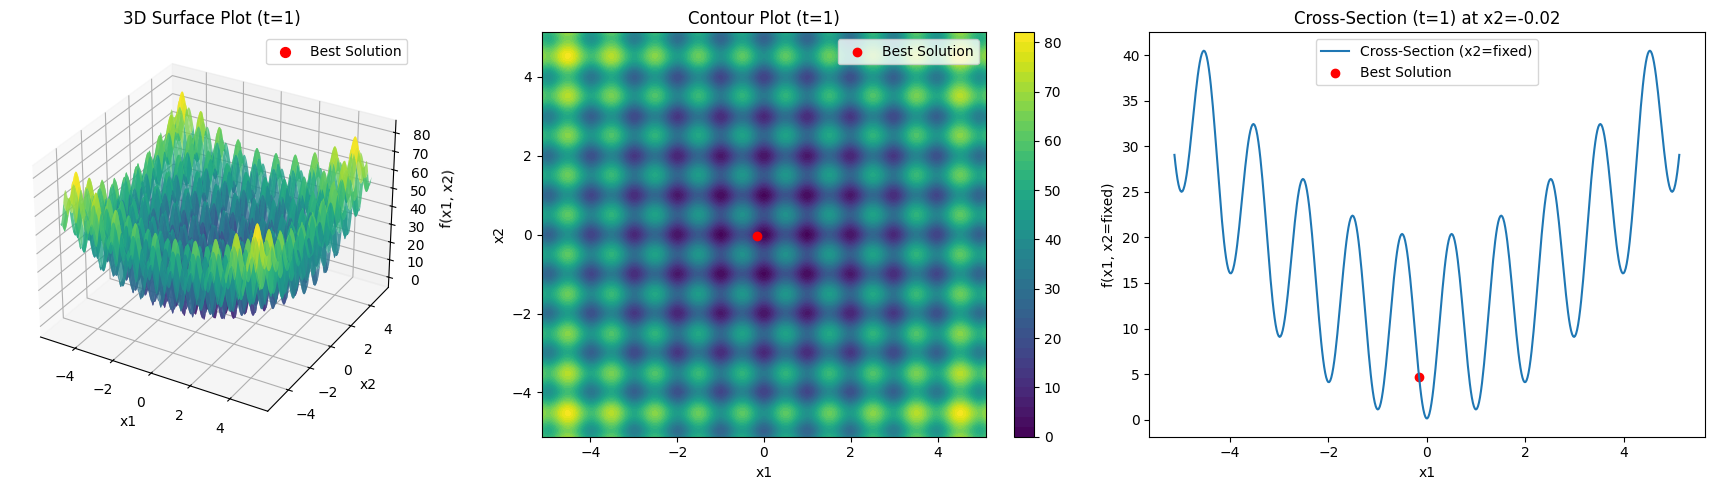

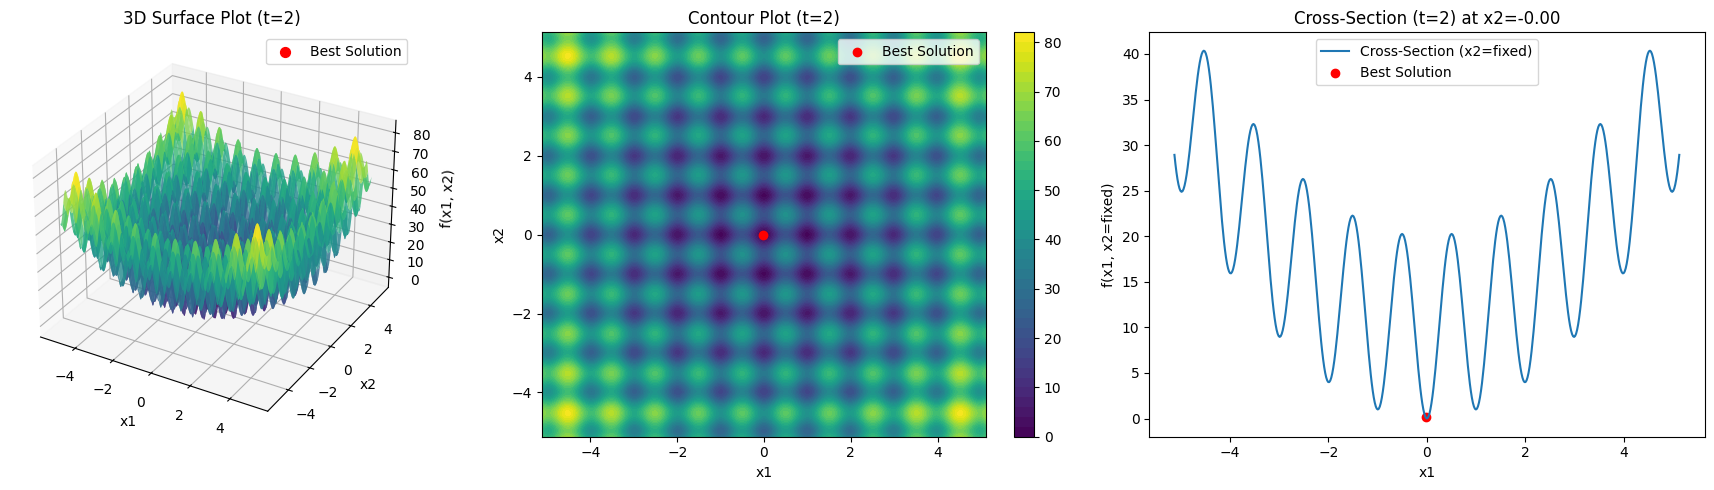

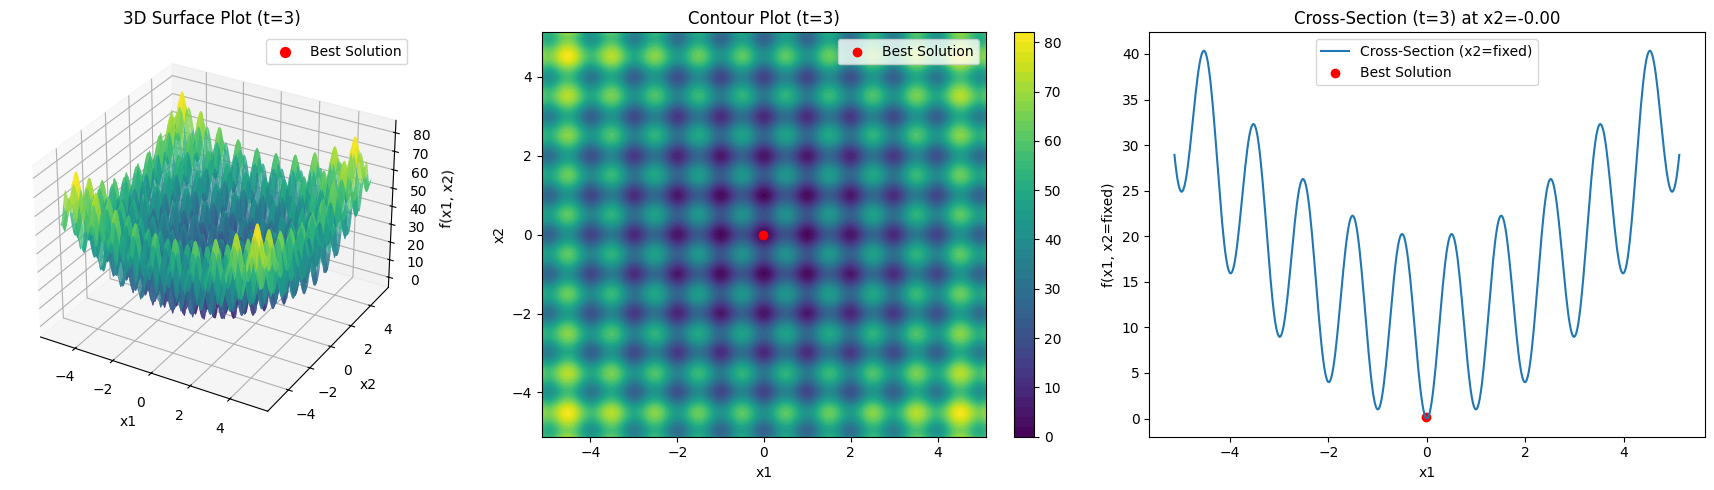

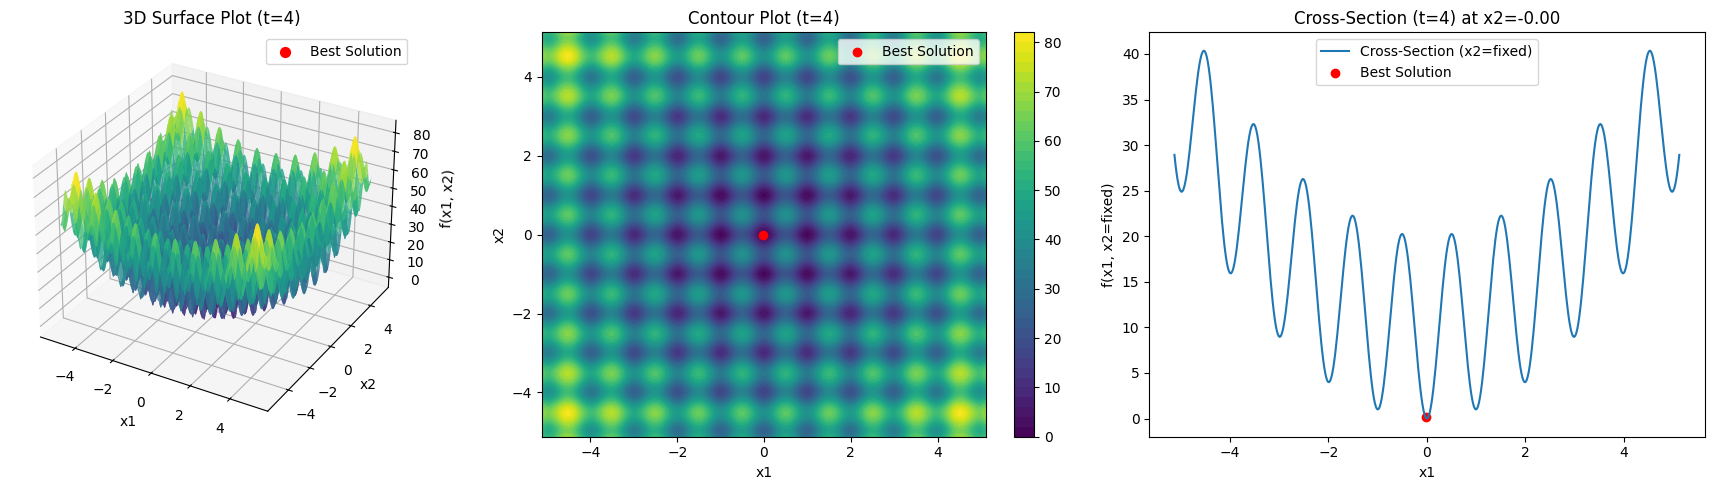

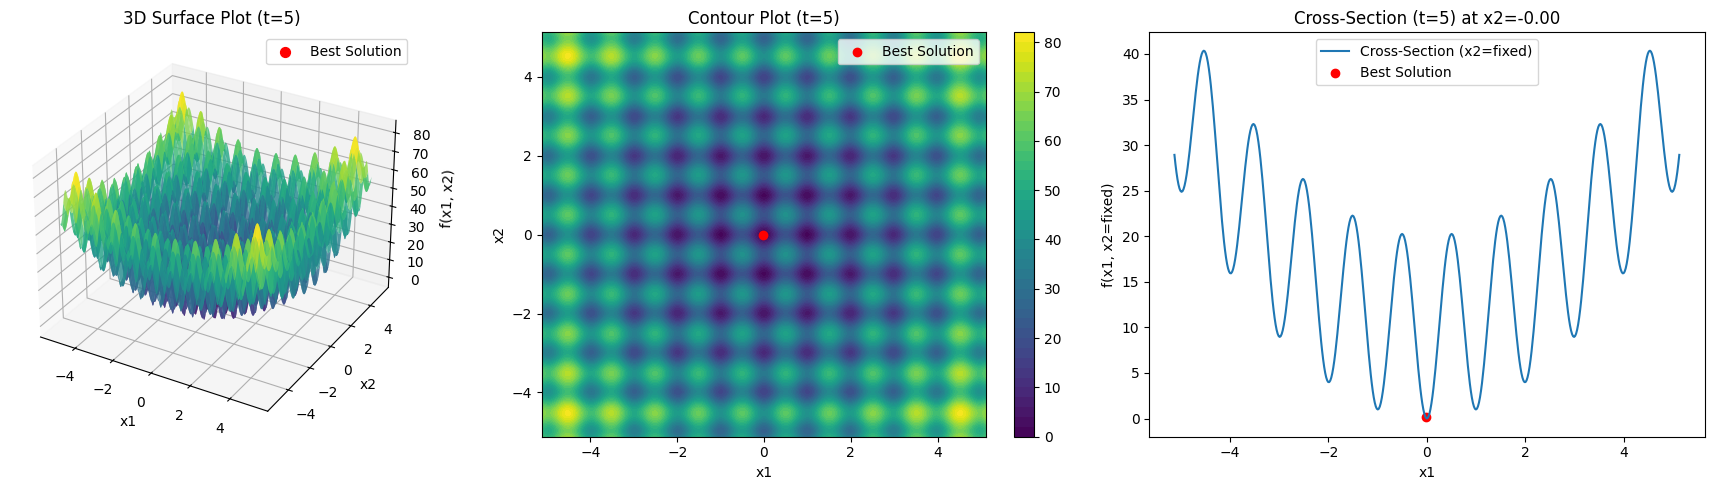

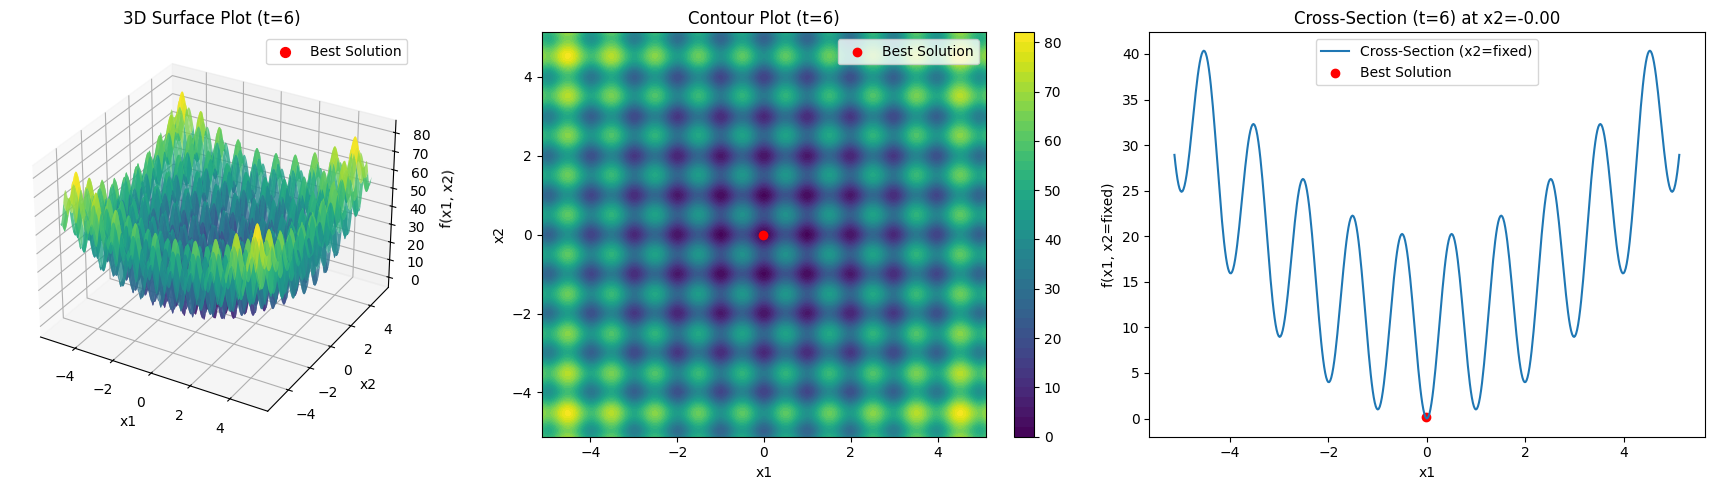

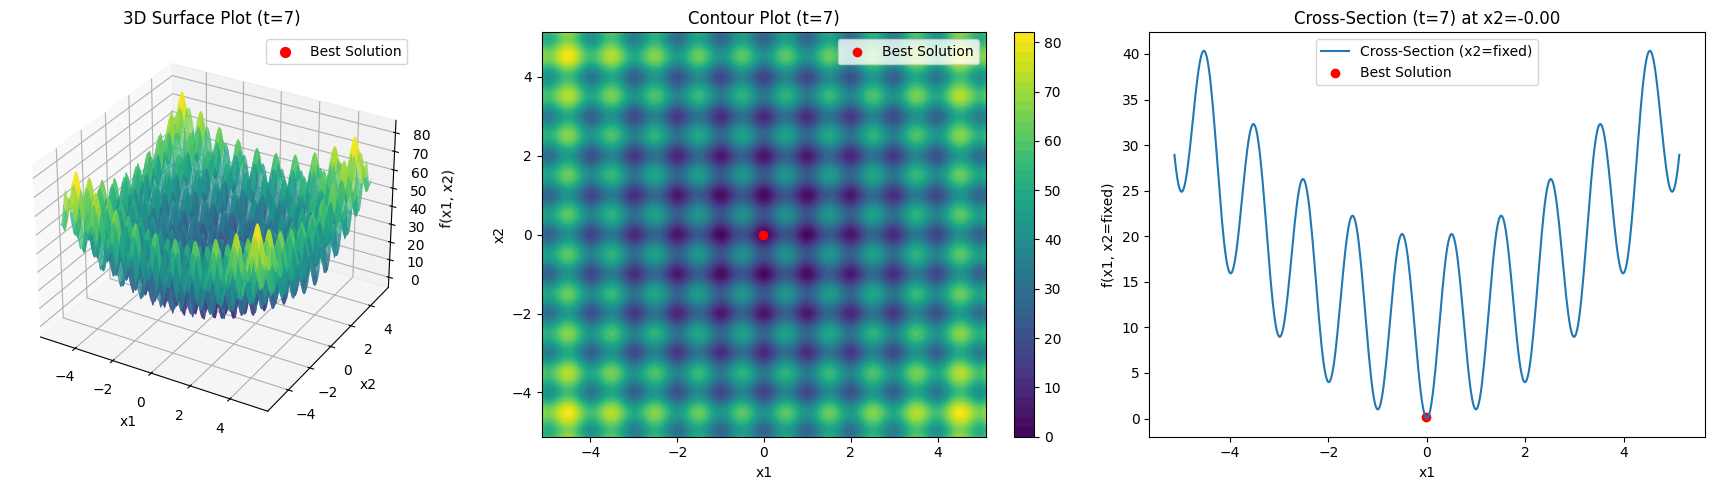

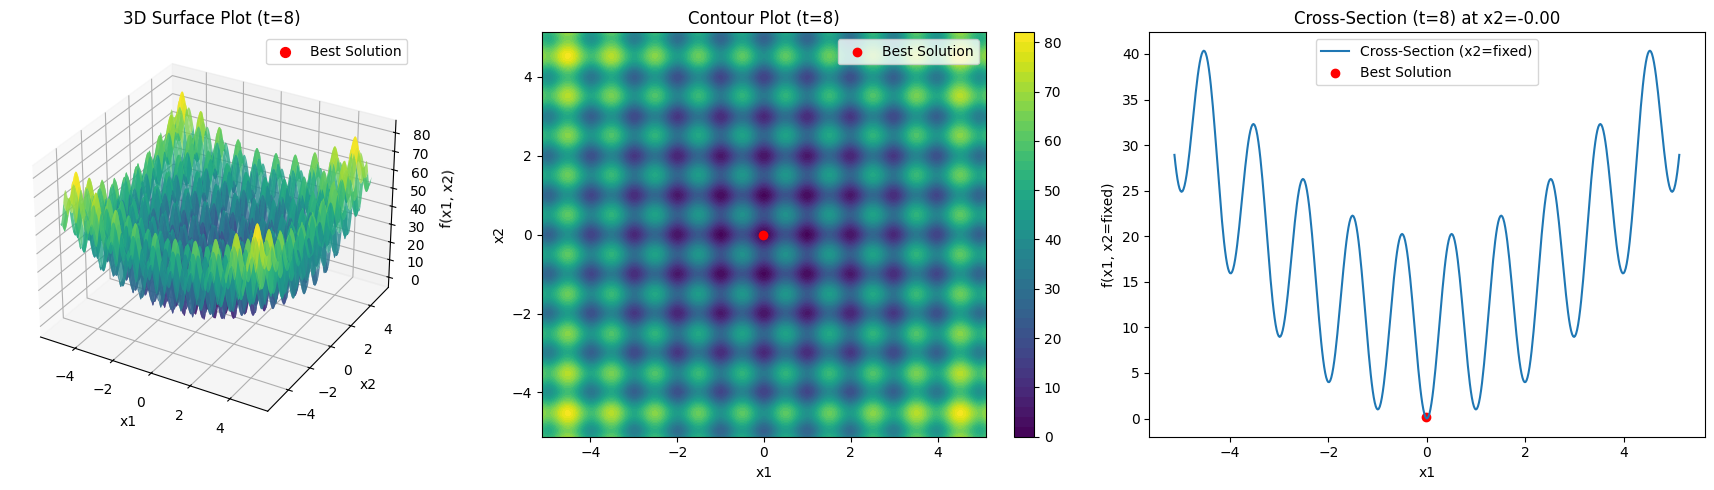

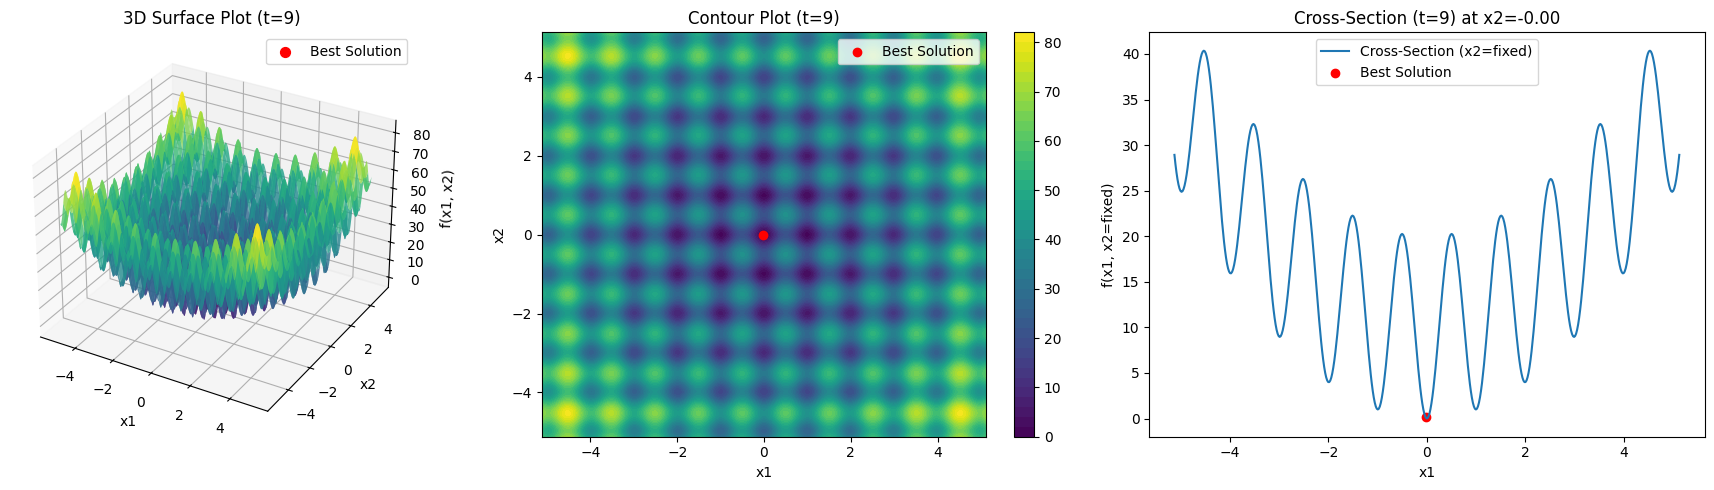

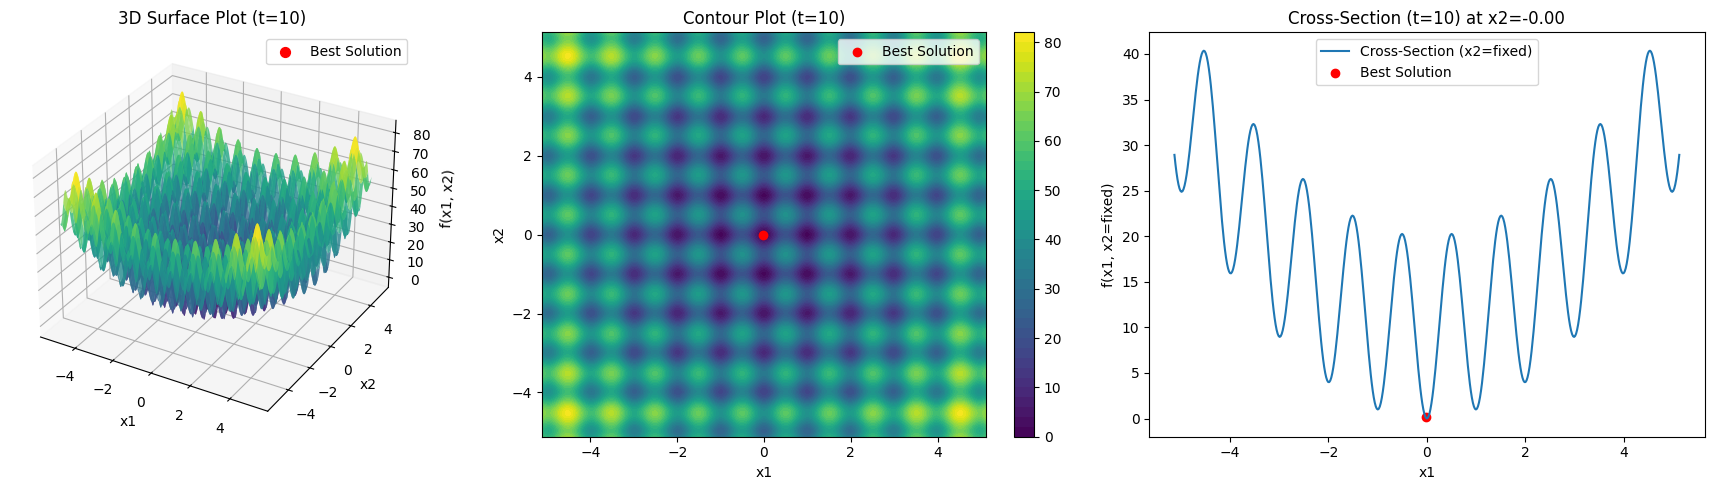

Best Fitness Values: [4.64528391 0.12506435 0.12506435 0.12506435 0.12506435 0.12506435
 0.12506435 0.12309139 0.12309139 0.12309139]
Global Best Fitness: 0.12309138722470436
Global Best Solution: [-0.02461398 -0.0039747 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rastrigin function
def fobj(x):
    x = np.array(x)  # x'i numpy dizisine dönüştür
    n = len(x)  # Dimension of the vector
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x), axis=-1)

# Get_F_details function
def Get_F_details(FN):
    if FN == "Rastrigin":
        lb = -5.12  # Lower bound
        ub = 5.12   # Upper bound
        dim = 2     # Dimension (2D for visualization)
        return lb, ub, dim, fobj
    else:
        raise ValueError("Function not defined!")

# SCO function
def SCO(FN, T):
    lb, ub, dim, fobj = Get_F_details(FN)
    ub = np.array([ub] * dim)
    lb = np.array([lb] * dim)
    Range = ub - lb
    P = 0  # P=0 indicates no fitness improvement, P=1 means fitness is improved

    # Initialize a random candidate solution
    S = np.array([lb[i] + np.random.rand() * (ub[i] - lb[i]) for i in range(dim)])  # S is the global best position
    BF = fobj(S)  # Fitness of the global best position
    POO = 0  # Initial counter to count unsuccessful fitness improvements
    m = 5  # Number of unsuccessful attempts to improve fitness
    alpha = 1000  # Number of function evaluations in the first phase
    b = 2.4

    Best_Fitness = np.zeros(T)  # To store the best fitness over iterations

    for t in range(1, T + 1):
        w_t = np.exp(-((b * t / T) ** b))  # Equation (3) in the paper
        if t > alpha and P == 0:
            POO += 1  # Counter for unsuccessful fitness improvements

        K = np.random.rand()
        x = np.zeros(dim)
        for j in range(dim):
            EE = w_t * K * Range[j]

            if t < alpha:
                if np.random.rand() < 0.5:
                    x[j] = S[j] + w_t * abs(S[j])
                else:  # Equation (2)
                    x[j] = S[j] - w_t * abs(S[j])
            else:
                if POO == m:
                    POO = 0  # Reset counter
                    if np.random.rand() < 0.5:
                        x[j] = S[j] + np.random.rand() * Range[j]
                    else:  # Equation (5)
                        x[j] = S[j] - np.random.rand() * Range[j]
                else:
                    if np.random.rand() < 0.5:
                        x[j] = S[j] + EE
                    else:  # Equation (4)
                        x[j] = S[j] - EE

            # Check if a dimension of the candidate solution goes out of boundaries
            if x[j] > ub[j]:
                x[j] = S[j]  # Equation (6)
            if x[j] < lb[j]:
                x[j] = S[j]

        # Evaluate the fitness of the newly generated candidate solution
        F_t = fobj(x)
        if F_t < BF:
            BF = F_t
            S = x
            P = 1
        else:
            P = 0

        Best_Fitness[t - 1] = BF
        gbest = S

        # Visualization
        x1 = np.linspace(lb[0], ub[0], 500)
        x2 = np.linspace(lb[1], ub[1], 500)
        X, Y = np.meshgrid(x1, x2)
        Z = np.array([fobj([i, j]) for i, j in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

        # 1. 3D Surface Plot
        fig = plt.figure(figsize=(18, 5))
        ax = fig.add_subplot(131, projection='3d')
        ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)
        ax.scatter(S[0], S[1], BF, color="red", s=50, label="Best Solution")
        ax.set_title(f"3D Surface Plot (t={t})")
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("f(x1, x2)")
        ax.legend()

        # 2. Contour Plot
        ax2 = fig.add_subplot(132)
        contour = ax2.contourf(X, Y, Z, levels=50, cmap="viridis")
        ax2.scatter(S[0], S[1], color="red", label="Best Solution")
        ax2.set_title(f"Contour Plot (t={t})")
        ax2.set_xlabel("x1")
        ax2.set_ylabel("x2")
        plt.colorbar(contour, ax=ax2)
        ax2.legend()

        # 3. Cross-Section Plot (for x2 = current best x2)
        ax3 = fig.add_subplot(133)
        x1_section = x1
        z_section = np.array([fobj([xi, S[1]]) for xi in x1_section])  # Düzeltildi
        ax3.plot(x1_section, z_section, label="Cross-Section (x2=fixed)")
        ax3.scatter(S[0], BF, color="red", label="Best Solution")
        ax3.set_title(f"Cross-Section (t={t}) at x2={S[1]:.2f}")
        ax3.set_xlabel("x1")
        ax3.set_ylabel("f(x1, x2=fixed)")
        ax3.legend()

        plt.tight_layout()
        plt.show()

    return Best_Fitness, BF, gbest

# Call SCO for Rastrigin function
FN = "Rastrigin"
T = 10  # Reduced to 10 iterations for visualization
Best_Fitness, BF, gbest = SCO(FN, T)

# Output results
print("Best Fitness Values:", Best_Fitness)
print("Global Best Fitness:", BF)
print("Global Best Solution:", gbest)
